In [1]:
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName('PySpark_Version_Equipo5').getOrCreate()

your 131072x1 screen size is bogus. expect trouble
23/09/28 18:16:50 WARN Utils: Your hostname, Nitro-Andre resolves to a loopback address: 127.0.1.1; using 172.22.45.199 instead (on interface eth0)
23/09/28 18:16:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/28 18:16:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Excel-to-DataFrame") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.7") \
    .getOrCreate()

your 131072x1 screen size is bogus. expect trouble
23/09/28 18:54:57 WARN Utils: Your hostname, Nitro-Andre resolves to a loopback address: 127.0.1.1; using 172.22.45.199 instead (on interface eth0)
23/09/28 18:54:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/gggandre/ia2/bigdata/pyspark/.venv/lib/python3.8/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/gggandre/.ivy2/cache
The jars for the packages stored in: /home/gggandre/.ivy2/jars
com.crealytics#spark-excel_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-c592b91b-e877-45c4-856c-0334a2886da6;1.0
	confs: [default]
	found com.crealytics#spark-excel_2.12;0.13.7 in central
	found org.apache.poi#poi;4.1.2 in central
	found commons-codec#commons-codec;1.13 in central
	found org.apache.commons#commons-collections4;4.4 in central
	found org.apache.commons#commons-math3;3.6.1 in central
	found com.zaxxer#SparseBitSet;1.2 in central
	found org.apache.poi#poi-ooxml;4.1.2 in central
	found org.apache.poi#poi-ooxml-schemas;4.1.2 in central
	found org.apache.xmlbeans#xmlbeans;3.1.0 in central
	found com.github.virtuald#curvesapi;1.06 in central
	found com.norbitltd#spoiwo_2.12;1.8.0 in central
	found org.scala-lang.modules#scala-xml_2.12;1.3.0 in central
	found com.github.pjfanning#excel-streaming-reader;2.3.6 in centr

In [5]:
vendedores_df = spark.read.format('com.crealytics.spark.excel') \
                          .option('header', 'true') \
                          .load('vendedores.xlsx')
vendedores_df.show()

+------+----+----------------+--------------------+-------+-----------------+--------------+--------------------+
|REGION|  ID|          NOMBRE|            APELLIDO|SALARIO|UNIDADES VENDIDAS|VENTAS TOTALES|PORCENTAJE DE VENTAS|
+------+----+----------------+--------------------+-------+-----------------+--------------+--------------------+
| NORTE|8725|          Arturo|     Bustos González|  12041|              212|          4554|              0.0693|
| NORTE|4352|      Jesús Said|         Caro Ibarra|  11504|              488|          3298|              0.0502|
| NORTE|5185|     Ana Valeria|     Cruz Montesinos|  10046|              429|          7238|              0.1102|
| NORTE|6918|         Miranda|         Doring Romo|  10266|              109|          5635|              0.0858|
| NORTE|8607|  Bruno Guissepe|      Garcini García|  10431|              222|          5405|              0.0823|
| NORTE|5158|   Donovan Hiram|         García Cruz|  11773|              438|          3

In [6]:
reporteNorte_df = vendedores_df.filter(vendedores_df['REGION'] == 'NORTE')
reporteNorte_df.show()

+------+----+--------------+--------------------+-------+-----------------+--------------+--------------------+
|REGION|  ID|        NOMBRE|            APELLIDO|SALARIO|UNIDADES VENDIDAS|VENTAS TOTALES|PORCENTAJE DE VENTAS|
+------+----+--------------+--------------------+-------+-----------------+--------------+--------------------+
| NORTE|8725|        Arturo|     Bustos González|  12041|              212|          4554|              0.0693|
| NORTE|4352|    Jesús Said|         Caro Ibarra|  11504|              488|          3298|              0.0502|
| NORTE|5185|   Ana Valeria|     Cruz Montesinos|  10046|              429|          7238|              0.1102|
| NORTE|6918|       Miranda|         Doring Romo|  10266|              109|          5635|              0.0858|
| NORTE|8607|Bruno Guissepe|      Garcini García|  10431|              222|          5405|              0.0823|
| NORTE|5158| Donovan Hiram|         García Cruz|  11773|              438|          3577|              

In [7]:
ventasNorte_df = reporteNorte_df.select("VENTAS TOTALES")
ventasNorte_df.show()

+--------------+
|VENTAS TOTALES|
+--------------+
|          4554|
|          3298|
|          7238|
|          5635|
|          5405|
|          3577|
|         10020|
|          7922|
|          8972|
|          9053|
+--------------+



In [8]:
ventasNorte_mean = ventasNorte_df.agg({'VENTAS TOTALES': 'mean'}).collect()[0][0]
print(f'Promedio de ventas región norte: {ventasNorte_mean}')

Promedio de ventas región norte: 6567.4


In [9]:
vendedoresNorte_df = reporteNorte_df.select("NOMBRE")
vendedoresNorte_df.show()

+--------------+
|        NOMBRE|
+--------------+
|        Arturo|
|    Jesús Said|
|   Ana Valeria|
|       Miranda|
|Bruno Guissepe|
| Donovan Hiram|
|        Ixchel|
|     Sebastián|
|       Gustavo|
|    Juan Pablo|
+--------------+



In [10]:
salariosNorte_df = reporteNorte_df.select("SALARIO")
salariosNorte_df.show()

+-------+
|SALARIO|
+-------+
|  12041|
|  11504|
|  10046|
|  10266|
|  10431|
|  11773|
|   8654|
|  11777|
|  12071|
|  12072|
+-------+



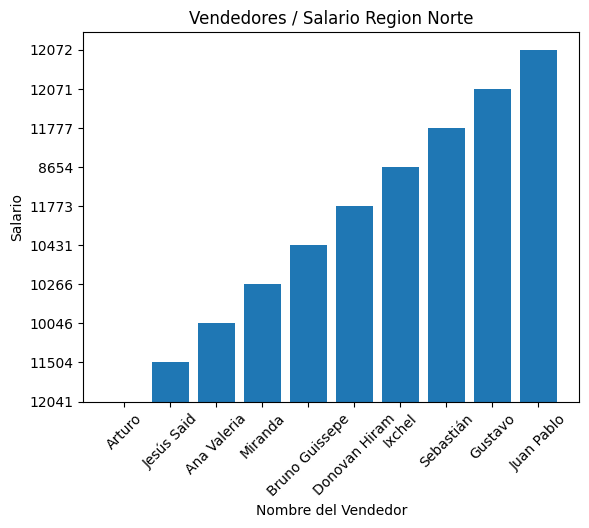

In [11]:
import matplotlib.pyplot as plt

# Convertir los DataFrames de PySpark a pandas
vendedoresNorte_pd = vendedoresNorte_df.toPandas()
salariosNorte_pd = salariosNorte_df.toPandas()

plt.bar(vendedoresNorte_pd["NOMBRE"], salariosNorte_pd["SALARIO"])
plt.xlabel('Nombre del Vendedor')
plt.ylabel('Salario')
plt.title('Vendedores / Salario Region Norte')
plt.xticks(rotation = 45)
plt.show()